<a href="https://colab.research.google.com/github/bernaldiaz/bernaldiaz/blob/main/Simulation_of_State_Space_Model_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Discretize the Model Using Backward Euler Method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [2]:
# define the system parameters
m1=2  ; m2=3   ; k1=100  ; k2=200 ; d1=1  ; d2=5;

In [3]:
# define the continuous-time system matrices
A=np.array([[0, 1, 0, 0],
             [-(k1+k2)/m1 ,  -(d1+d2)/m1 , k2/m1 , d2/m1 ],
             [0 , 0 ,  0 , 1],
             [k2/m2,  d2/m2, -k2/m2, -d2/m2]])
B=np.array([[0],[0],[0],[1/m2]])
C=np.array([[1, 0, 0, 0]])

In [4]:
#define an initial state for simulation
x0=np.zeros(shape=(4,1))

In [5]:
# define the number of time-samples used for the simulation
time=30000
# discretization constant
h=0.001
#define an input sequence for the simulation
#input_seq=np.random.rand(time,1)
input_seq=10*np.ones(shape=(1,time))
#plt.plot(input_sequence)

In [6]:
I=np.identity(A.shape[0]) # this is an identity matrix
A_D=inv(I-h*A)
B_D=h*np.matmul(A_D,B)
C_D=C

In [7]:
# check the eigenvalues
# continuous time system
eigen_A=np.linalg.eig(A)[0]
# discrete-time system
print(eigen_A)

[-2.22732544+13.96129613j -2.22732544-13.96129613j
 -0.10600789 +4.08234464j -0.10600789 -4.08234464j]


In [8]:
eigen_A_D=np.linalg.eig(A_D)[0]
# the following function simulates the state-space model using
# the backward Euler method
# the input parameters are:
#    -- Am,Bm,Cm           - discrete-time system matrices
#    -- initial_state      - the initial state of the system
#    -- input_sequence     - input sequence for simulation
#    -- time_steps         - the total number of simulation time steps
# this function returns the state sequence and the output sequence
# they are stored in the matrices Xm and Ym, respectively

In [9]:
def simulate(Am,Bm,Cm,initial_state,input_sequence,time_steps):
    Xm=np.zeros(shape=(Am.shape[0],time_steps+1))
    Ym=np.zeros(shape=(Cm.shape[0],time_steps+1))

    for i in range(0,time_steps):
       if i==0:
           Xm[:,[i]]=initial_state
           Ym[:,[i]]=np.matmul(Cm,initial_state)
           inputTmp=input_sequence[0,i].reshape(Bm.shape[1],1)
           x=np.matmul(Am,initial_state)+np.matmul(Bm,inputTmp)
       else:
           Xm[:,[i]]=x
           Ym[:,[i]]=np.matmul(Cm,x)
           inputTmp=input_sequence[0,i].reshape(Bm.shape[1],1)
           x=np.matmul(Am,x)+np.matmul(Bm,inputTmp)

    Xm[:,[-1]]=x
    Ym[:,[-1]]=np.matmul(Cm,x)
    return Xm, Ym

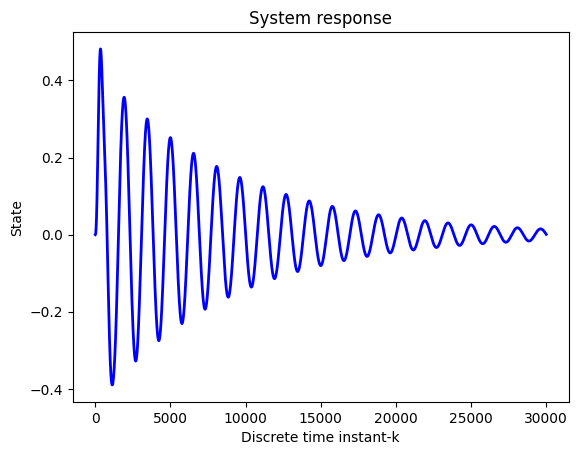

In [10]:
state,output=simulate(A_D,B_D,C_D,x0,input_seq, time)

plt.plot(state[1,:], color='blue',linewidth=2)
plt.xlabel('Discrete time instant-k')
plt.ylabel('State')
plt.title('System response')
plt.savefig('step_responseEuler.png',dpi=600)
plt.show()
# save the simulation data
np.save('matrixStateEuler.npy', state)